In [518]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [519]:
df_titanic = pd.read_csv('train.csv', index_col=0)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [520]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [521]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### A2Q1: What categories of passengers were most likely to survive the Titanic disaster? Use age, gender and cabin class of passengers

In [522]:
df_titanic['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [523]:
mean_age = df_titanic.groupby('Survived')['Age'].mean()
mean_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [524]:
df_titanic.groupby(['Survived', 'Sex'])['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [525]:
df_titanic.groupby('Survived')['Pclass'].value_counts(normalize=True)*100

Survived  Pclass
0         3         67.759563
          2         17.668488
          1         14.571949
1         1         39.766082
          3         34.795322
          2         25.438596
Name: Pclass, dtype: float64

In [670]:
df_titanic.groupby(['Survived', 'Sex', 'Pclass'])['Ticket'].count()

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Ticket, dtype: int64

In [527]:
df_titanic['Embarked'].value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [528]:
((df_titanic['Embarked'] == 'S') & (df_titanic['Survived'] == 1)).value_counts(normalize=True)

False    0.756453
True     0.243547
dtype: float64

In [529]:
df_titanic.groupby('Survived')['Embarked'].value_counts(normalize=True)*100

Survived  Embarked
0         S           77.777778
          C           13.661202
          Q            8.561020
1         S           63.823529
          C           27.352941
          Q            8.823529
Name: Embarked, dtype: float64

In [530]:
# create a new column for passengers with family members
df_titanic['family'] = (df_titanic['SibSp'] > 0) | (df_titanic['Parch'] > 0)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [531]:
# proportion of all passengers with family and no family onboard
df_titanic['family'].value_counts(normalize=True)

False    0.602694
True     0.397306
Name: family, dtype: float64

In [532]:
# the proportion of survivors that had family and those with no family onboard
((df_titanic['family'] == True) & (df_titanic['Survived'] == 1)).value_counts(normalize=True)

False    0.799102
True     0.200898
dtype: float64

In [533]:
df_titanic.groupby('Survived')['family'].value_counts(normalize=True)

Survived  family
0         False     0.681239
          True      0.318761
1         True      0.523392
          False     0.476608
Name: family, dtype: float64

In [534]:
p_survived = df_titanic[df_titanic['Survived'] == 1]
p_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 2 to 890
Data columns (total 12 columns):
Survived    342 non-null int64
Pclass      342 non-null int64
Name        342 non-null object
Sex         342 non-null object
Age         290 non-null float64
SibSp       342 non-null int64
Parch       342 non-null int64
Ticket      342 non-null object
Fare        342 non-null float64
Cabin       136 non-null object
Embarked    340 non-null object
family      342 non-null bool
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 32.4+ KB


In [571]:
# Is the fare paid by passengers has any effect on survival?
# using median rather than mean because it's not affected by outliers
median_fare = df_titanic['Fare'].median()
median_fare

14.4542

In [640]:
nofare = df_titanic[df_titanic['Fare'] == 0]['Survived'].value_counts(normalize=True)*100
nofare

0    93.333333
1     6.666667
Name: Survived, dtype: float64

In [639]:
fare_paid = df_titanic[df_titanic['Fare'] > 0]['Survived'].value_counts(normalize=True)*100
fare_paid

0    61.073059
1    38.926941
Name: Survived, dtype: float64

In [681]:
by_age = p_survived.groupby('Sex')['Age'].mean()
mean_age_female = round(by_age['female'])
mean_age_male = round(by_age['male'])

# handling missing values in age column
import warnings
warnings.simplefilter('ignore')
# source: stackoverflow question 44111425
c1 = (p_survived['Sex'] == 'female') & (p_survived['Age'].isnull())
c2 = (p_survived['Sex'] == 'male') & (p_survived['Age'].isnull())
p_survived.loc[c1,'Age'] = p_survived.loc[c1,'Age'].fillna(mean_age_female)
p_survived.loc[c2,'Age'] = p_survived.loc[c2,'Age'].fillna(mean_age_male)

# create age groupings for visualization
p_survived['age_bins'] = pd.cut(age_col,6,labels=['0-13', '14-27', '28-41', '42-55', '56-69', '70-83'], include_lowest=True)
p_survived['age_bins'].head()

PassengerId
2     28-41
3     14-27
4     28-41
9     28-41
10    14-27
Name: age_bins, dtype: category
Categories (6, object): [0-13 < 14-27 < 28-41 < 42-55 < 56-69 < 70-83]

In [682]:
p_survived.groupby(['Sex', 'age_bins'])['Ticket'].count()

Sex     age_bins
female  0-13         21
        14-27        69
        28-41       106
        42-55        25
        56-69        12
male    0-13         21
        14-27        19
        28-41        51
        42-55        14
        56-69         3
        70-83         1
Name: Ticket, dtype: int64

In [536]:
# Stackoverflow question 18770504
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

Text(0.5,0,'Nofare(perished/survived)')

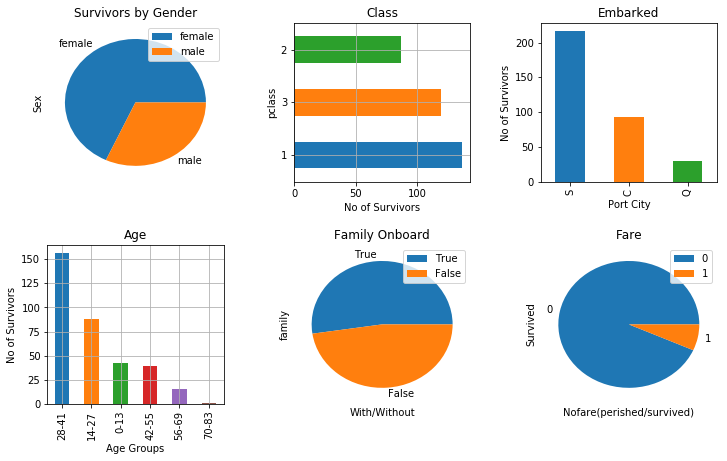

In [650]:
fig, axs = plt.subplots(2,3, figsize=(12,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplot(2,3,1)
p_survived['Sex'].value_counts().plot(kind='pie', title='Survivors by Gender', legend=True)
plt.subplot(2,3,2)
p_survived['Pclass'].value_counts().plot(kind='barh', title='Class', grid=True)
plt.ylabel('pclass')
plt.xlabel('No of Survivors')
plt.subplot(2,3,3)
p_survived['Embarked'].value_counts().plot(kind='bar', title='Embarked')
plt.ylabel('No of Survivors')
plt.xlabel('Port City')
plt.subplot(2,3,4)
p_survived['age_bins'].value_counts().plot(kind='bar', title='Age', grid=True)
plt.ylabel('No of Survivors')
plt.xlabel('Age Groups')
plt.subplot(2,3,5)
p_survived['family'].value_counts().plot(kind='pie', title='Family Onboard', legend=True)
plt.xlabel('With/Without')
plt.subplot(2,3,6)
df_titanic[df_titanic['Fare'] == 0]['Survived'].value_counts().plot(kind='pie', title='Fare', legend=True)
plt.xlabel('Nofare(perished/survived)')